# Import the necessary libraries

In [1]:
import bs4 as bs
import urllib.request
import re
import heapq

from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

import matplotlib.pyplot as plt

# Loading the data from wikipedia

In [2]:
source = urllib.request.urlopen('https://simple.wikipedia.org/wiki/Global_warming').read()
soup = bs.BeautifulSoup(source, 'html.parser')

# Fetching the paragraph tag

In [3]:
text = ""
for paragraph in soup.find_all('p'):
    text += paragraph.text

# Function to clean the text

In [4]:
def cleaning(text):
    text = re.sub(r'\[[0-9]*\]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    
    clean_text = text.lower()
    clean_text = re.sub(r'\W', ' ', clean_text)
    clean_text = re.sub(r'\d', ' ', clean_text)
    clean_text = re.sub(r'\s+',' ', clean_text)
    
    return text, clean_text

In [5]:
text, clean_text = cleaning(text)

# Sentence tokenization

In [6]:
sentences = sent_tokenize(text)
sentences[:5]

['Global warming is the current rise in temperature of the air and oceans.',
 'It happens because humans burn coal, oil and natural gas, and cut down forests.',
 'Average temperatures today are about 1 °C (1.8 °F) higher than before people started burning a lot of coal around 1750.',
 'In some parts of the world it is less and some more.',
 'Most climate scientists say that by the year 2100 temperatures will be 2 °C (3.6 °F) to 4 °C (7.2 °F) higher than they were before 1750.']

# Counting the number of words

In [7]:
word2count = {}
for word in word_tokenize(clean_text):
    if word not in stopwords.words('english'):
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [8]:
list(word2count.items())[:10]

[('global', 7),
 ('warming', 8),
 ('current', 2),
 ('rise', 6),
 ('temperature', 17),
 ('air', 8),
 ('oceans', 2),
 ('happens', 1),
 ('humans', 2),
 ('burn', 8)]

# Bar graph for each of the word

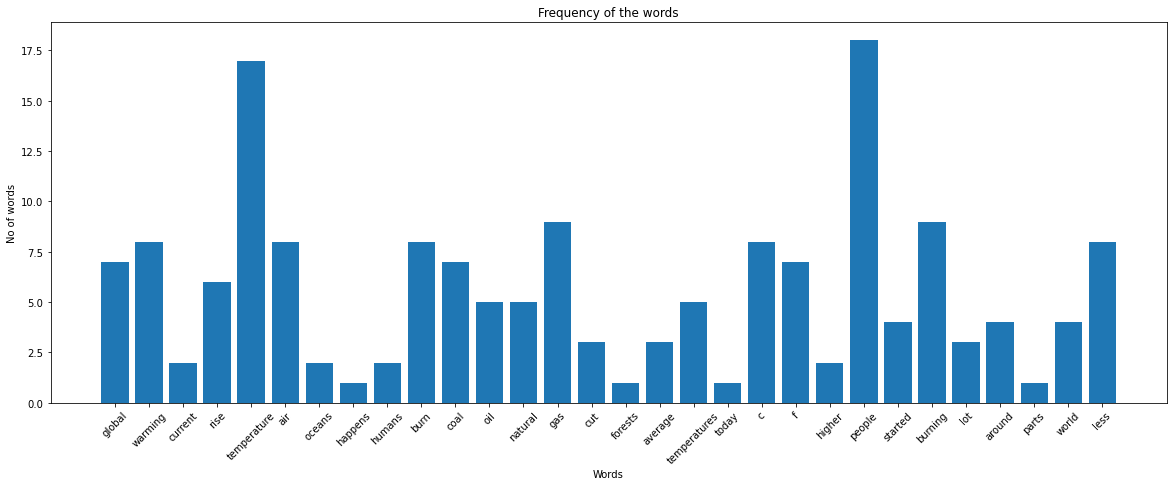

In [9]:
plt.figure(figsize=(20,7))
plt.bar(list(word2count.keys())[:30], list(word2count.values())[:30])
plt.title('Frequency of the words')
plt.xlabel('Words')
plt.xticks(rotation=45)
plt.ylabel('No of words')
plt.show()

# Normalize the data

In [10]:
for key in word2count.keys():
    word2count[key] = word2count[key]/max(word2count.values())

In [11]:
list(word2count.items())[:5]

[('global', 0.3888888888888889),
 ('warming', 0.4444444444444444),
 ('current', 0.1111111111111111),
 ('rise', 0.3333333333333333),
 ('temperature', 0.9444444444444444)]

# Plot after normalizsation of the data

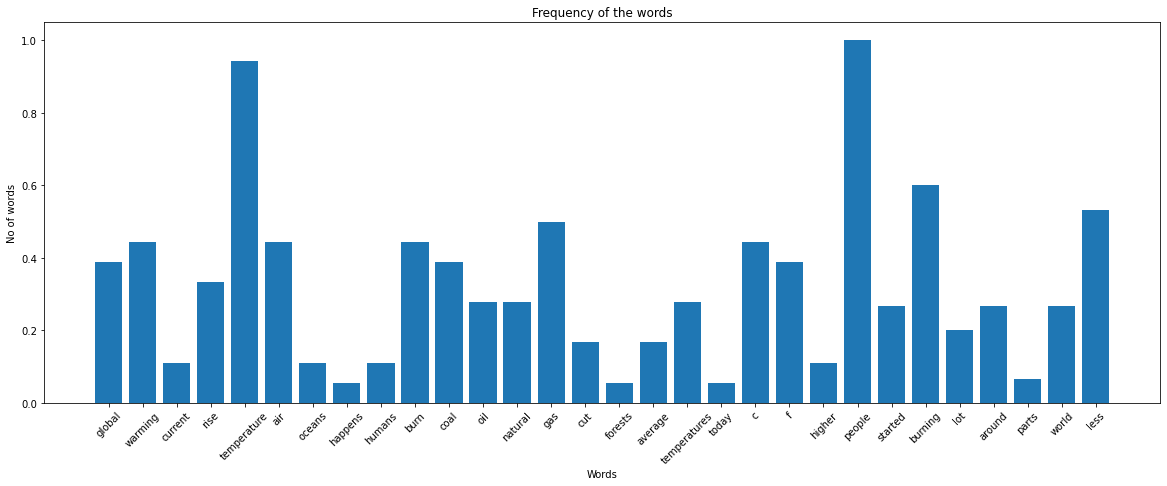

In [12]:
plt.figure(figsize=(20,7))
plt.bar(list(word2count.keys())[:30], list(word2count.values())[:30])
plt.title('Frequency of the words')
plt.xlabel('Words')
plt.xticks(rotation=45)
plt.ylabel('No of words')
plt.show()

# Scoring sentences on the basis of word score for each word present in it

In [13]:
sent2score = {}
for sentence in sentences:
    for word in word_tokenize(sentence.lower()):
        if word in word2count.keys():
            if len(sentence.split(' ')) < 25:
                if sentence not in sent2score.keys():
                    sent2score[sentence] = word2count[word]
                else:
                    sent2score[sentence] += word2count[word]

In [14]:
list(sent2score.items())[:5]

[('Global warming is the current rise in temperature of the air and oceans.',
  2.777777777777778),
 ('It happens because humans burn coal, oil and natural gas, and cut down forests.',
  2.2777777777777772),
 ('Average temperatures today are about 1 °C (1.8 °F) higher than before people started burning a lot of coal around 1750.',
  3.3333333333333335),
 ('In some parts of the world it is less and some more.', 0.8666666666666667),
 ('The extra warmth melts ice caps around the world.', 1.5333333333333332)]

# Fetching the top 5 sentences

In [15]:
best_sentences = heapq.nlargest(5, sent2score, key=sent2score.get)

# Creating summary from best sentences

In [16]:
'. '.join(best_sentences)

"People can also use energy sources that don't burn fossil fuel, like solar panels or electricity from nuclear power or wind power.. When people burn fossil fuels like coal, oil and natural gas this adds carbon dioxide into the air.. Soon after, scientists studying all different kinds of science began to work together to figure out the mystery of GHG emissions and their effects.. An ice core, captured through drilling, provided clear evidence that carbon dioxide levels have risen.. Many cities are sea ports and under threat of flooding if the present sea level rises."